In [6]:
import numpy as np

In [17]:
class LinearRegression:
    def __init__(self,n_iters=1000,lr=0.01):
        self.n_iters = n_iters
        self.lr = lr
        
        self.w = None
        self.b = None
        
    def loss(self,y,preds):
        return np.sum(np.square(y-preds))/y.shape[0]
        
    def fit(self,X,y):
        n_samples,n_features = X.shape
        
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.n_iters):
            
            preds = self.predict(X)
            
            #update weights n bias
#             dw = ((2/y.shape[0])* np.dot(X.T,preds-y)) + (2 * self.lr * self.w) #Ridge regression
            dw = ((2/y.shape[0])* np.dot(X.T,preds-y)) + (self.lr) # Lasso regression
            
         
            db = (2/y.shape[0])* np.sum(y-preds)
            
            self.w -= self.lr * dw
            self.b -= self.lr * db
            
    def predict(self,X):
        return np.dot(X,self.w) + self.b
    
        

In [18]:
import sklearn
from sklearn import datasets
X, y = datasets.make_regression(n_samples=100,n_features=1,noise=20)

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

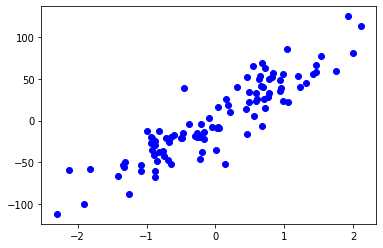

In [20]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],y,color='b')

In [21]:
model = LinearRegression(500,0.001)
model.fit(X_train,y_train)

In [22]:
predictions = model.predict(X_test)

In [23]:
laass = model.loss(y_test,predictions)

In [24]:
laass

924.5250347508634

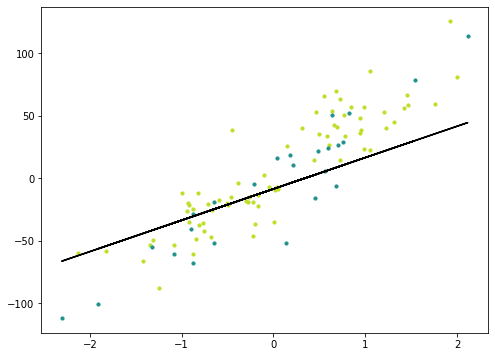

In [25]:
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train,y_train,color=cmap(0.9),s=10)
m2 = plt.scatter(X_test,y_test,color=cmap(0.5),s=10)
plt.plot(X_test,predictions,color='black')
plt.show()